<a href="https://colab.research.google.com/github/ArielaLevkov/ImageProcessing_TA/blob/main/recitations/06_Recitation_ImageProcessingRecitation_MedianFilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import os
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import PIL
from scipy.signal import convolve
from scipy.ndimage import median_filter
import random
random.seed(3)

In [13]:
GITHUB_PATH = 'https://raw.githubusercontent.com/ArielaLevkov/ImageProcessing_TA/main/images/'

def read_file(fname:str, file_path:str=GITHUB_PATH) -> np.ndarray:
    '''
    Accept an image file name (defaulty located in GitHub) and return the image
    in a numpy array.

    Args:
        fname: the file name
        file_path: the file path.. Default value is Doron's Github repo.

    Returns:
        the image converted into a Numpy array.
    '''
    file_path = os.path.join(file_path, fname)
    response = requests.get(file_path)
    fp = BytesIO(response.content)

    img_pil = PIL.Image.open(fp)
    return np.array(img_pil, dtype='int16')

In [14]:
def plot_images(img1:np.array, img2:np.array):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))
    axes[0].imshow(img1,  cmap='gray')
    axes[1].imshow(img2,  cmap='gray')

<div dir="rtl">

## 6. מסנן חציון (Median Filter):

דוגמה למסנן חציון 1D בלי padding:
<dir>

In [34]:
img = np.array([7,4,3,8,1])
new_img = img.copy()
ncols = img.shape[0]
filter_ncols = 3
bcols = filter_ncols // 2
for r in range(bcols, ncols-bcols):
    filter = img[r-bcols:r+bcols+1]
    sort_vec = np.sort(filter, axis=None)
    mid = len(sort_vec) // 2
    print(filter, sort_vec, sort_vec[mid])
    new_img[r] = sort_vec[mid]
print(new_img)

[7 4 3] [3 4 7] 4
[4 3 8] [3 4 8] 4
[3 8 1] [1 3 8] 3
[7 4 4 3 1]


<div dir="rtl">

### 6.1 רעש "מלח פלפל":
<dir>

In [15]:
def sp_noise(img:np.array, d:float) -> np.array:
    '''
    add 'salt & pepper' noise with density d to an image, imnoise first assigns
    each pixel a random probability value from a standard uniform distribution
    on the open interval (0, 1).
    For pixels with probability value in the range (0, d/2), the pixel value is
      set to 0. The number of pixels that are set to 0 is
      approximately d*numel(I)/2.
    For pixels with probability value in the range [d/2, d), the pixel value is
      set to the maximum value of the image data type. The number of pixels that
      are set to the maximum value is approximately d*numel(I)/2.
    For pixels with probability value in the range [d, 1), the pixel value is
      unchanged.
    Args:
        img: image in float format (range: 0..1)
    Returns:
        img1: in float format (range: 0..1) - s&p noised image
    '''
    img1 = img.copy()
    nrows, ncols = img.shape
    for i in range(nrows):
        for j in range(ncols):
            rdn = random.random()
            if rdn <= d/2:
                img1[i][j] = 0.0
            elif d/2 < rdn < d:
                img1[i][j] = 1.0
            else:
                img1[i][j] = img[i][j]
    return img1

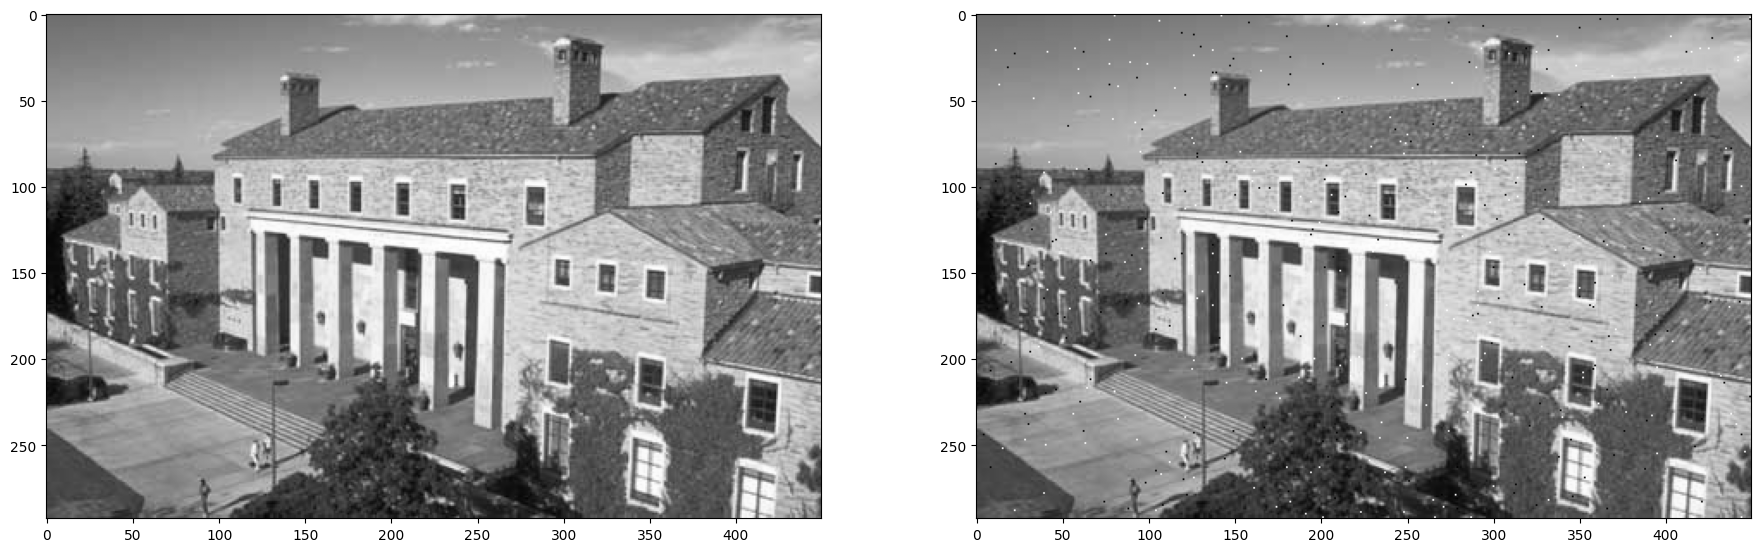

In [36]:
img = read_file(fname='house.tiff') / 255
img1 = sp_noise(img, 0.003)

plot_images(img, img1)

<div dir="rtl">

### 6.2 מסנן חציון (Median Filter):

לכל פיקסל:

1. לוקחים את השכנים (למשל חלון 3×3)
2. ממיינים את הערכים
3. בוחרים את החציון - הערך האמצעי

<dir>

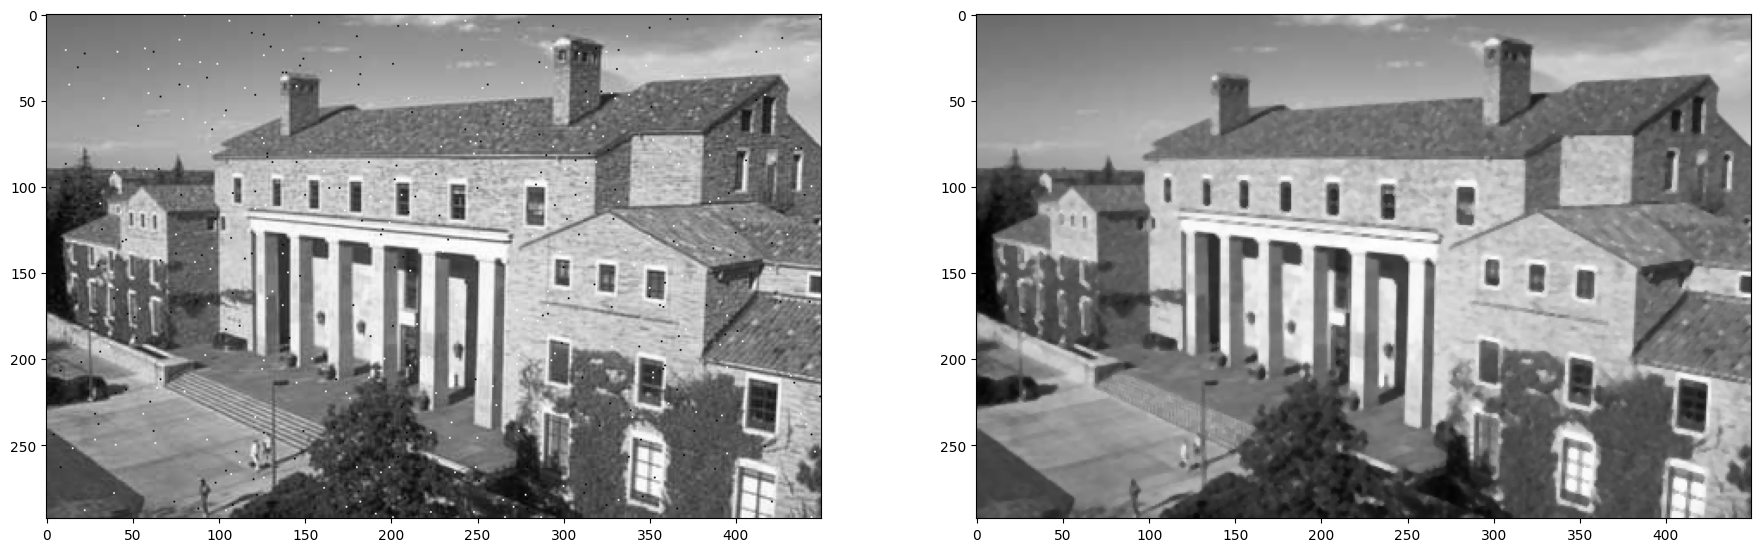

In [37]:
img2 = img1.copy()
img2 = median_filter(img, size=3)
plot_images(img1, img2)

<div dir="rtl">

**שאלה:** מה יקרה אם נשתמש במסנן חציוני גדול מדי (לדוגמה: 13x13 במקום 3x3)?

<dir>

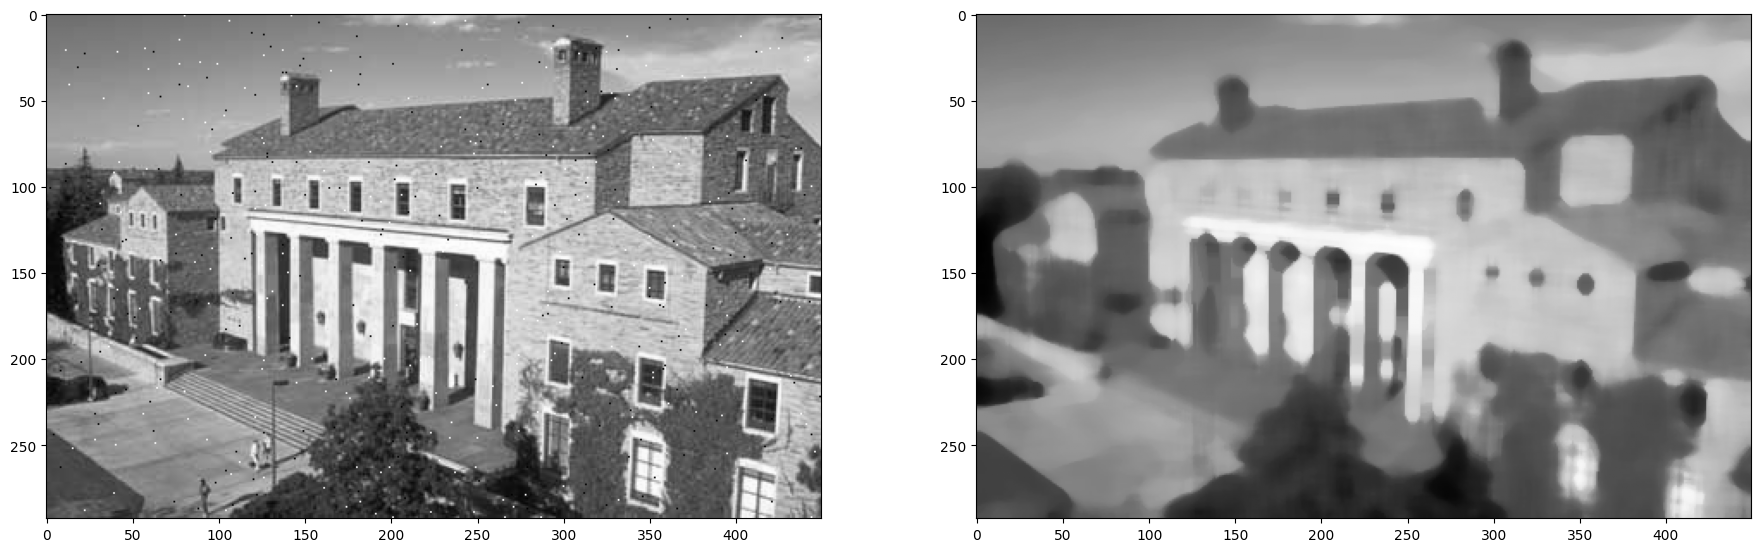

In [39]:
img3 = img1.copy()
img3 = median_filter(img, size=13)
plot_images(img1, img3)

<div dir="rtl">

**תשובה:** אם החלון גדול מידי החציון יתעלם מהקצוות שכן חשובים והרבה מהמידע ייעלם ונקבל תמונה מטושטשת.  
<dir>

<div dir="rtl">

### 6.3 בחירת מסנן לפי כיוון רעש המלח פלפל:


<dir>

<div dir="rtl">

כיוון הרעש נוצר ע"י קונבוצלוציה עם מסכה.

<dir>

<div dir="rtl">

#### 6.3.1 רעש אופקי:


<dir>

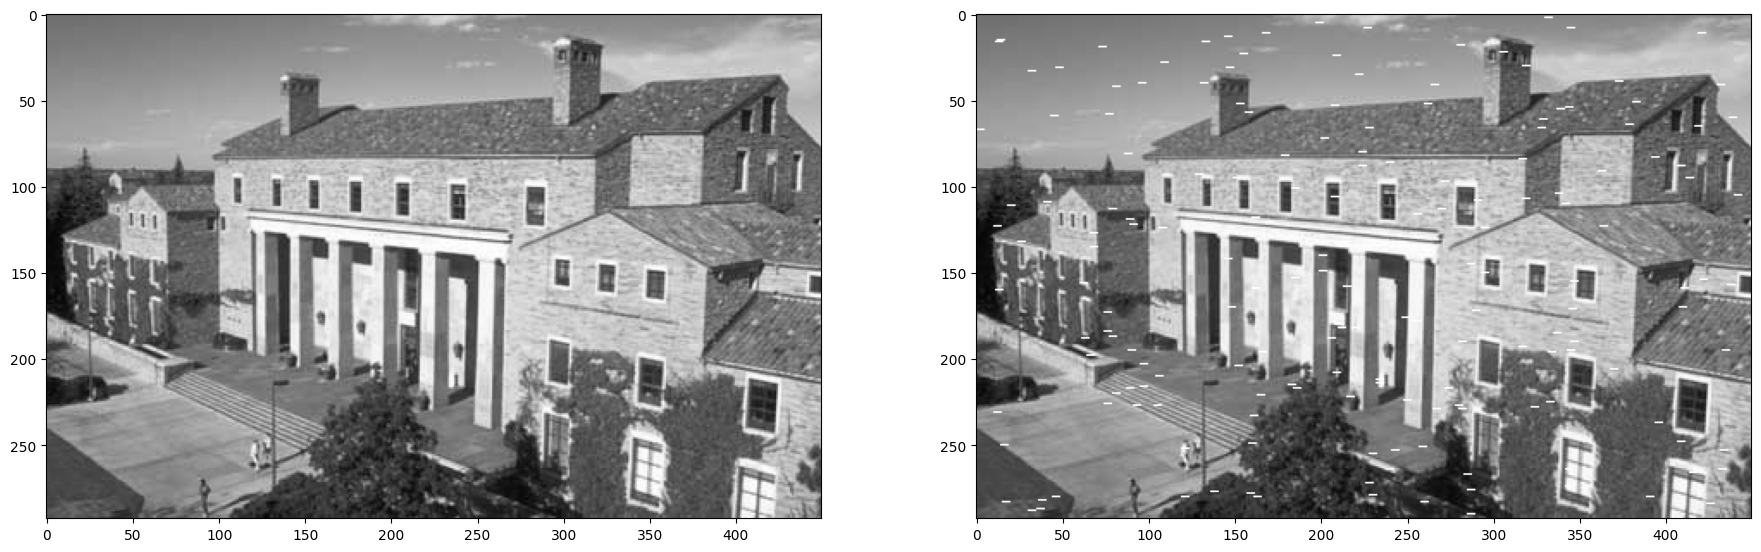

In [45]:
mask = np.zeros(shape=img.shape)
mask = sp_noise(mask, 0.003)
kernel = np.array([[1,1,1,1,1]])
mask = convolve(in1=mask, in2=kernel, mode='same')
mask = np.clip(mask, a_min=0.0, a_max=1.0)
img4 = np.maximum(img, mask)
plot_images(img,img4)

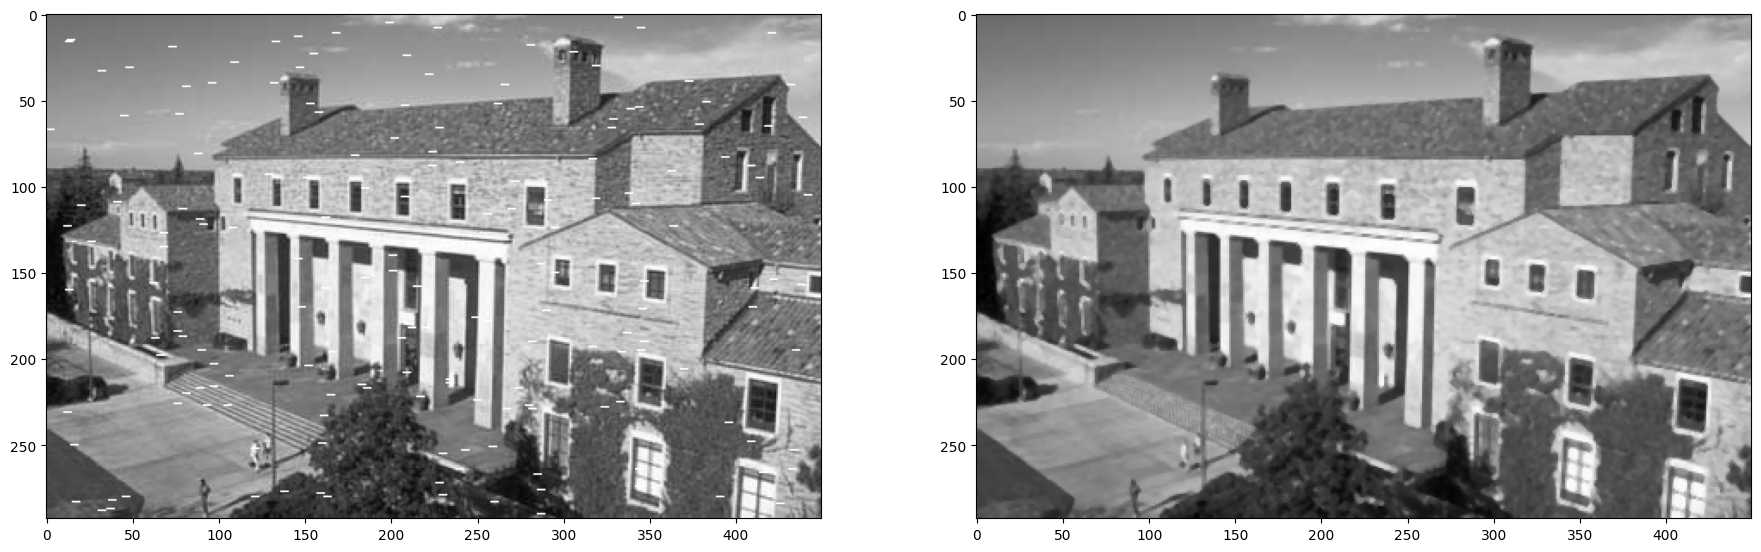

In [46]:
img5 = img4.copy()
img5 = median_filter(img, size=3)
plot_images(img4, img5)

<div dir="rtl">

#### 6.3.1 רעש בצורת צלב:


<dir>

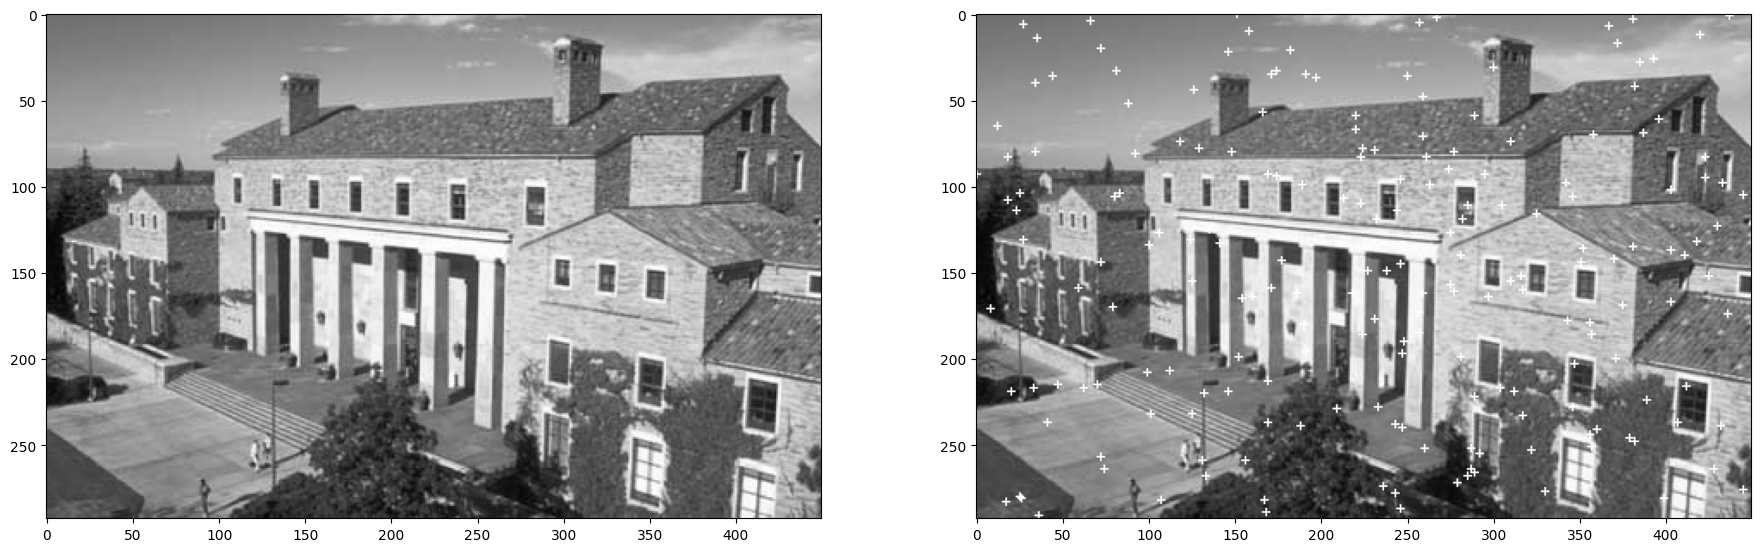

In [47]:
mask = np.zeros(shape=img.shape)
mask = sp_noise(mask, 0.003)
kernel = np.array([[0,0,1,0,0],
                   [0,0,1,0,0],
                   [1,1,1,1,1],
                   [0,0,1,0,0],
                   [0,0,1,0,0]])
mask = convolve(in1=mask, in2=kernel, mode='same')
mask = np.clip(mask, a_min=0.0, a_max=1.0)
img6 = np.maximum(img, mask)
plot_images(img,img6)

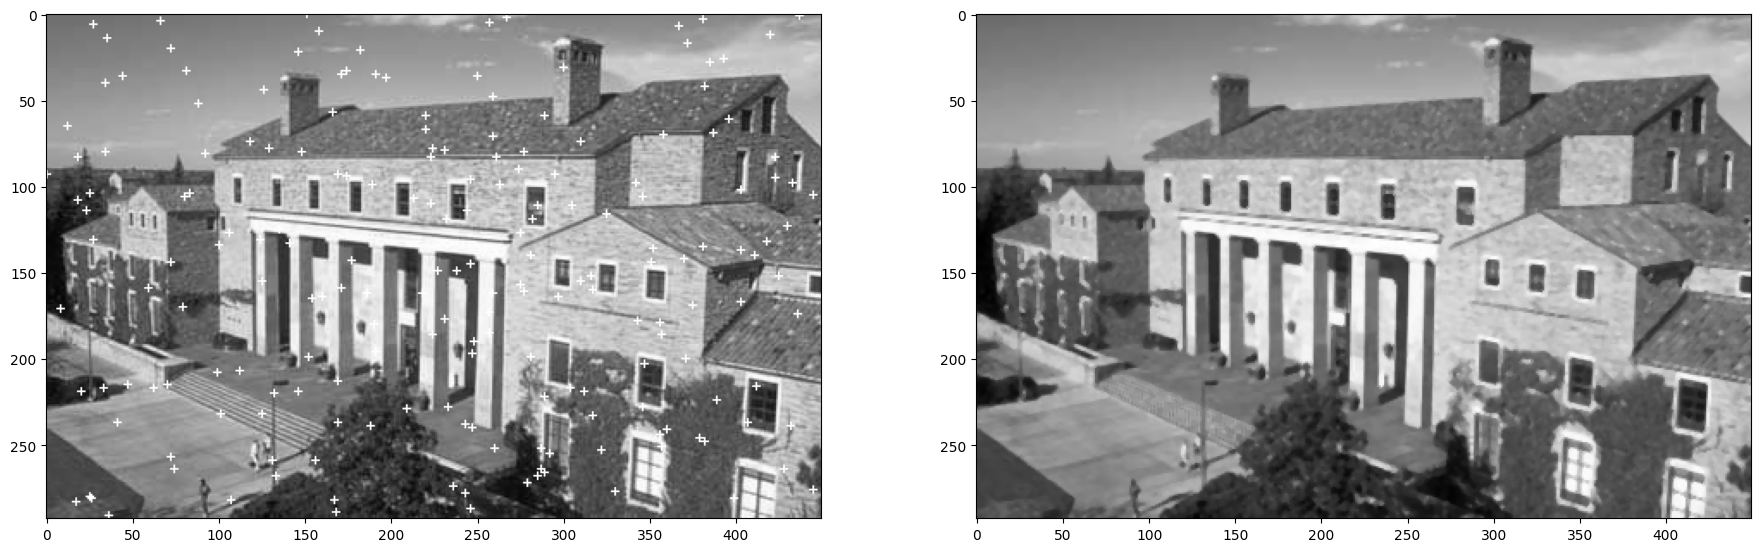

In [50]:
img7 = img6.copy()
img7 = median_filter(img, size=3)
plot_images(img6, img7)

<div dir="rtl">

**שימו לב** - הפונקציה median_filter לא עושה מסנן כיווני ולכן התוצאות לא מספיק טובות
<dir>

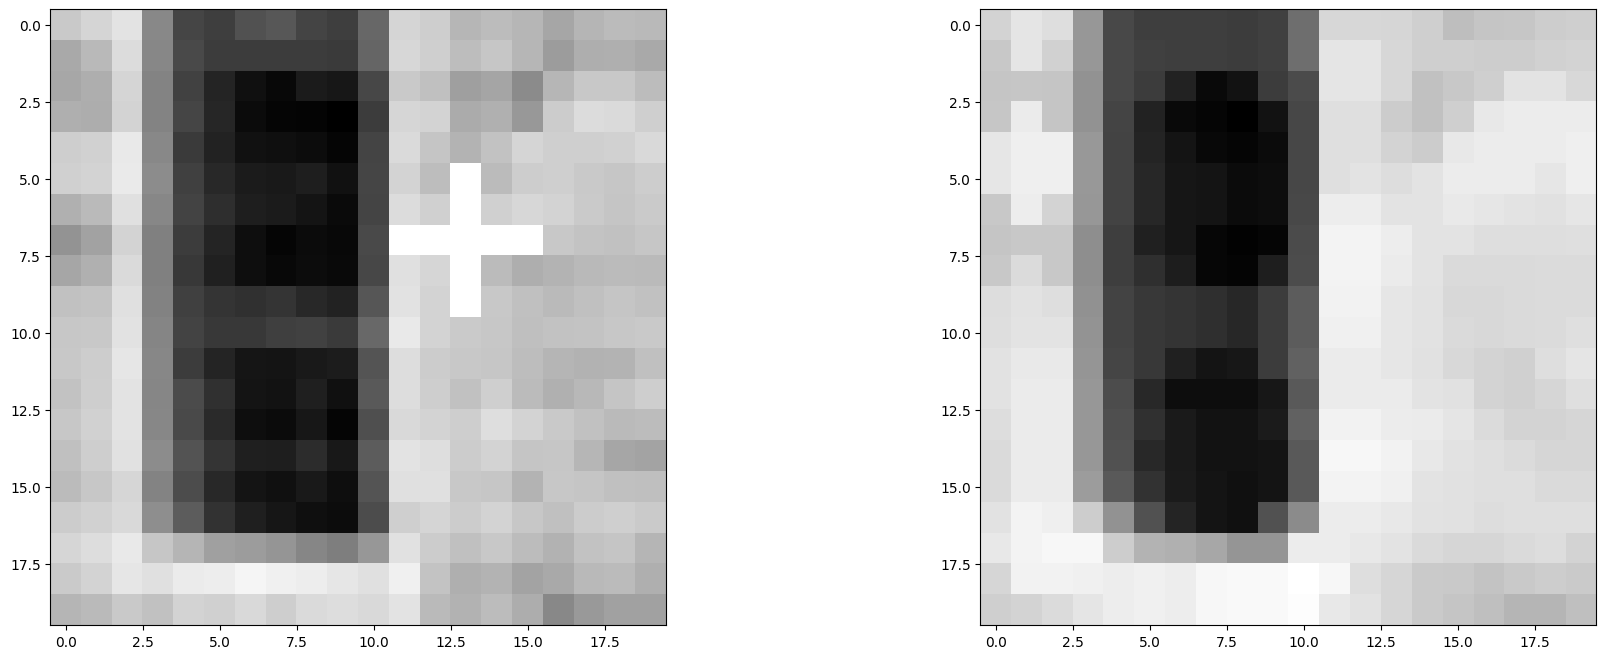

In [53]:
r0, r1 = 100, 120
c0, c1 = 200, 220

crop_img6 = img6[r0:r1, c0:c1]
crop_img7 = img7[r0:r1, c0:c1]

plot_images(crop_img6, crop_img7)